In [1]:
import nltk
from collections import Counter

In [2]:
import sys
sys.version

'3.5.4 |Anaconda, Inc.| (default, Oct 13 2017, 11:22:58) \n[GCC 7.2.0]'

In [3]:
from nltk.corpus import gutenberg
from nltk.corpus import europarl_raw
from nltk.corpus import wordnet

### Sentence Tokenization
* sent_tokenize
* PunktSentenceTokenizer
* RegexpTokenizer
* Pre-trained sentence tokenization models

In [5]:
alice = gutenberg.raw(fileids='carroll-alice.txt')

In [6]:
sample_text = "We will discuss briefly about the basic syntax, structure and\
design philosophies. There is a defined hierarchical syntax for Python code which you should remember\
when writing code! Python is a really powerful programming language!"

In [7]:
len(alice)

144395

In [8]:
print(alice[:100])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was


In [9]:
# default sent_tokenize
default_st = nltk.sent_tokenize

alice_sentences = default_st(alice, language='english')

In [10]:
len(alice_sentences)

1625

In [11]:
default_st(sample_text)

['We will discuss briefly about the basic syntax, structure anddesign philosophies.',
 'There is a defined hierarchical syntax for Python code which you should rememberwhen writing code!',
 'Python is a really powerful programming language!']

In [12]:
alice_sentences[:5]

["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I.",
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'",
 'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.',
 "There was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, 'Oh dear!",
 'Oh dear!']

In [13]:
# other language

gernam_txt = europarl_raw.german.raw(fileids='ep-00-01-17.de')

In [14]:
print(gernam_txt[:100])

 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit


In [15]:
germans = default_st(gernam_txt, language='german')

In [16]:
germans[:5]

[' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .',
 'Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .',
 'Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .',
 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .',
 'Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .']

In [17]:
# loading german text tokenizer into a PunkSentenceTokenizer instance
german_tokenizer = nltk.data.load(resource_url='tokenizers/punkt/german.pickle')

In [18]:
germans_2 = german_tokenizer.tokenize(gernam_txt)

In [19]:
germans_2[:5]

[' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .',
 'Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .',
 'Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .',
 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .',
 'Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .']

In [20]:
germans == germans_2

True

In [21]:
# tokenize using the default PunktSentenceTokenizer class
punk_st = nltk.tokenize.PunktSentenceTokenizer()

In [22]:
punk_st.tokenize(sample_text)

['We will discuss briefly about the basic syntax, structure anddesign philosophies.',
 'There is a defined hierarchical syntax for Python code which you should rememberwhen writing code!',
 'Python is a really powerful programming language!']

In [23]:
# regular expression-based tokenizer
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'

In [24]:
regex_st = nltk.tokenize.RegexpTokenizer(pattern=SENTENCE_TOKENS_PATTERN, gaps=True)

In [25]:
regex_st.tokenize(sample_text)

['We will discuss briefly about the basic syntax, structure anddesign philosophies.',
 'There is a defined hierarchical syntax for Python code which you should rememberwhen writing code!',
 'Python is a really powerful programming language!']

### Word Tokenization
* word_tokenize
* TreebankWordTokenizer
* RegexpTokenizer
* Inherited tokenizers from RegexpTokenizer

In [26]:
sentence = "The brown fox wasn't that quick and he couldn't win the race"

In [27]:
# default word tokenizer
default_wd = nltk.word_tokenize

In [28]:
default_wd(text=sentence)

['The',
 'brown',
 'fox',
 'was',
 "n't",
 'that',
 'quick',
 'and',
 'he',
 'could',
 "n't",
 'win',
 'the',
 'race']

In [29]:
treebank_wt = nltk.TreebankWordTokenizer()

In [30]:
treebank_wt.tokenize(sentence)

['The',
 'brown',
 'fox',
 'was',
 "n't",
 'that',
 'quick',
 'and',
 'he',
 'could',
 "n't",
 'win',
 'the',
 'race']

In [31]:
TOKEN_PATTERN = r'\w+'
regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=False)

In [32]:
regex_wt.tokenize(sentence)

['The',
 'brown',
 'fox',
 'wasn',
 't',
 'that',
 'quick',
 'and',
 'he',
 'couldn',
 't',
 'win',
 'the',
 'race']

In [33]:
GAP_PATTERN = r'\s+'
regex_wt = nltk.RegexpTokenizer(pattern=GAP_PATTERN, gaps=True)

In [34]:
regex_wt.tokenize(sentence)

['The',
 'brown',
 'fox',
 "wasn't",
 'that',
 'quick',
 'and',
 'he',
 "couldn't",
 'win',
 'the',
 'race']

In [35]:
for a,b in regex_wt.span_tokenize(sentence):
    print(a, b, sentence[a:b])

0 3 The
4 9 brown
10 13 fox
14 20 wasn't
21 25 that
26 31 quick
32 35 and
36 38 he
39 47 couldn't
48 51 win
52 55 the
56 60 race


In [36]:
wordpunk_wt = nltk.WordPunctTokenizer()

In [37]:
wordpunk_wt.tokenize(sentence)

['The',
 'brown',
 'fox',
 'wasn',
 "'",
 't',
 'that',
 'quick',
 'and',
 'he',
 'couldn',
 "'",
 't',
 'win',
 'the',
 'race']

In [38]:
whitespace_wt = nltk.WhitespaceTokenizer()

In [39]:
whitespace_wt.tokenize(sentence)

['The',
 'brown',
 'fox',
 "wasn't",
 'that',
 'quick',
 'and',
 'he',
 "couldn't",
 'win',
 'the',
 'race']

### Text Normalization
* Cleaning Text
* Tokenizing Text
* Removing Special Characters
* Expanding Contractions
* Case Conversions
* Removing Stopwords
* Correcting Words
* Stemming
* Lemmatization

In [40]:
import re
import string

In [41]:
corpus = ["The brown fox wasn't that quick and he couldn't win the race",
         "Hey that's a great deal! I just bought a phone for $199",
         "@@You'll (learn) a **lot** in the book. Python is an amazing language!@@"]

In [42]:
def tokenize_text(text):
    '''generic tokenization function'''
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sent) for sent in sentences]
    return word_tokens

In [43]:
token_list = [tokenize_text(a) for a in corpus]
token_list

[[['The',
   'brown',
   'fox',
   'was',
   "n't",
   'that',
   'quick',
   'and',
   'he',
   'could',
   "n't",
   'win',
   'the',
   'race']],
 [['Hey', 'that', "'s", 'a', 'great', 'deal', '!'],
  ['I', 'just', 'bought', 'a', 'phone', 'for', '$', '199']],
 [['@',
   '@',
   'You',
   "'ll",
   '(',
   'learn',
   ')',
   'a',
   '**lot**',
   'in',
   'the',
   'book',
   '.'],
  ['Python', 'is', 'an', 'amazing', 'language', '!'],
  ['@', '@']]]

In [44]:
def remove_characters_after_tokenization(tokens):
    pattern = re.compile("[{}]".format(string.punctuation))
    return [pattern.sub("", token) for token in tokens if pattern.sub("", token)]

In [45]:
[remove_characters_after_tokenization(tokens) for sent in token_list for tokens in sent]

[['The',
  'brown',
  'fox',
  'was',
  'nt',
  'that',
  'quick',
  'and',
  'he',
  'could',
  'nt',
  'win',
  'the',
  'race'],
 ['Hey', 'that', 's', 'a', 'great', 'deal'],
 ['I', 'just', 'bought', 'a', 'phone', 'for', '199'],
 ['You', 'll', 'learn', 'a', 'lot', 'in', 'the', 'book'],
 ['Python', 'is', 'an', 'amazing', 'language'],
 []]

In [46]:
pat = re.compile("[{}]".format(string.punctuation))

In [47]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def remove_characters_before_tokenization(sentence, keep_apostrophes=False):
    
    sentence = sentence.strip()
    if keep_apostrophes:
        pat = r'[?|$|&|@|*|%|(|)|~|!]'
        filtered_sentence = re.sub(pat, '', sentence)
    else:
        pat = r'[^a-zA-Z0-9 ]'
        filtered_sentence = re.sub(pat, '', sentence)
    return filtered_sentence

In [49]:
[remove_characters_before_tokenization(sent) for sent in corpus]

['The brown fox wasnt that quick and he couldnt win the race',
 'Hey thats a great deal I just bought a phone for 199',
 'Youll learn a lot in the book Python is an amazing language']

In [50]:
cleaned_corpus = [remove_characters_before_tokenization(sent, keep_apostrophes=True) for sent in corpus]
cleaned_corpus

["The brown fox wasn't that quick and he couldn't win the race",
 "Hey that's a great deal I just bought a phone for 199",
 "You'll learn a lot in the book. Python is an amazing language"]

In [51]:
# Expanding Contractions


In [52]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 01 01:11:02 2016

@author: DIP
"""

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [53]:
def expand_contractions(sentence, contraction_mapping):
    pattern = re.compile("({})".format("|".join(contraction_mapping.keys())), 
                         flags=re.IGNORECASE|re.DOTALL)
    
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expand_contraction = contraction_mapping.get(match.lower(), '')
        return first_char + expand_contraction[1:]
    
    return pattern.sub(expand_match, sentence)

In [54]:
expanded_corpus = [expand_contractions(s, CONTRACTION_MAP) for s in cleaned_corpus]
expanded_corpus

['The brown fox was not that quick and he could not win the race',
 'Hey that is a great deal I just bought a phone for 199',
 'You will learn a lot in the book. Python is an amazing language']

In [55]:
# case conversions

# lower / upper conversion

In [56]:
# Removing Stopwords
nltk.corpus.stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [57]:
def remove_stopwords(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [token for token in tokens if token not in stopwords]

In [58]:
expanded_corpus_tokens = [tokenize_text(txt) for txt in expanded_corpus]
expanded_corpus_tokens

[[['The',
   'brown',
   'fox',
   'was',
   'not',
   'that',
   'quick',
   'and',
   'he',
   'could',
   'not',
   'win',
   'the',
   'race']],
 [['Hey',
   'that',
   'is',
   'a',
   'great',
   'deal',
   'I',
   'just',
   'bought',
   'a',
   'phone',
   'for',
   '199']],
 [['You', 'will', 'learn', 'a', 'lot', 'in', 'the', 'book', '.'],
  ['Python', 'is', 'an', 'amazing', 'language']]]

In [59]:
[remove_stopwords(tokens) for corpus in expanded_corpus_tokens for tokens in corpus]

[['The', 'brown', 'fox', 'quick', 'could', 'win', 'race'],
 ['Hey', 'great', 'deal', 'I', 'bought', 'phone', '199'],
 ['You', 'learn', 'lot', 'book', '.'],
 ['Python', 'amazing', 'language']]

In [60]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
# Correcting Words


In [62]:
pat = re.compile(r'(\w*)(\w)\2(\w*)')
mat_sub = r'\1\2\3'

In [63]:
old_word = 'finalllyyy'
step = 1
while True:
    print(step, old_word, wordnet.synsets(old_word))
    new_word = pat.sub(mat_sub, old_word)
    
    if new_word == old_word or wordnet.synsets(new_word):
        old_word = new_word
        break
    
    step += 1
    old_word = new_word
    
print('Final word:', old_word)

1 finalllyyy []
2 finalllyy []
3 finallly []
Final word: finally


In [64]:
wordnet.synsets(old_word)

[Synset('finally.r.01'), Synset('ultimately.r.01'), Synset('last.r.02')]

In [65]:
old_word

'finally'

In [66]:
wordnet.synsets(old_word)

[Synset('finally.r.01'), Synset('ultimately.r.01'), Synset('last.r.02')]

In [67]:
def remove_repeated_characters(tokens):
    pat = re.compile(r'(\w*)(\w)\2(\w*)')
    sub = r'\1\2\3'
    
    def replace(old_word):
        print(old_word)
        # base case
        if wordnet.synsets(old_word):
            return old_word
        
        # recursive step
        new_word = pat.sub(sub, old_word)
        if new_word == old_word:
            return old_word
        else:
            return replace(new_word)
    
    return [replace(token) for token in tokens]

In [68]:
sample_sentence = 'My schooool is reallllyyyyy amaaazinggggg'

In [69]:
remove_repeated_characters(tokenize_text(sample_sentence)[0])

My
schooool
schoool
school
is
reallllyyyyy
reallllyyyy
reallllyyy
reallllyy
realllly
reallly
really
amaaazinggggg
amaaazingggg
amaaazinggg
amaaazingg
amaaazing
amaazing
amazing


['My', 'school', 'is', 'really', 'amazing']

In [70]:
wordnet.synsets('school')

[Synset('school.n.01'),
 Synset('school.n.02'),
 Synset('school.n.03'),
 Synset('school.n.04'),
 Synset('school.n.05'),
 Synset('school.n.06'),
 Synset('school.n.07'),
 Synset('school.v.01'),
 Synset('educate.v.03'),
 Synset('school.v.03')]

In [71]:
# Correcting Spelling



In [72]:
def tokens(text):
    '''
    get all words from the corpus
    '''
    return re.findall(r'[a-z]+', text.lower())


def edits0(word):
    '''
    return all strings that are zero edits away from the input word
    '''
    return {word}

def edits1(word):
    '''
    return all strings that are one edit away from the input word
    
    edit could be replace|delete|transpose|insert
    '''
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    
    def split(word):
        '''
        return a list of pair (a, b) such that a+b = word
        '''
        return [(word[:i], word[i:]) for i in range(len(word)+1)]
    
    pairs = split(word)
    # one edit
    result = []
    for a, b in pairs:
        tmp = [
            a+b[1:],    # delete
        ]
        
        if len(b) > 1:
            tmp.append(a + b[1] + b[0] + b[2:])   # transpose
        for c in alphabet:
            tmp.append(a+c+b[1:])  # replace
            tmp.append(a+c+b)      # insert
        
        result.extend(tmp)
    return set(result)

def edits2(word):
    '''
    return all strings that are two edits away from the input word
    '''
    result = set()
    for e1 in edits1(word):
        result |= edits1(e1)
    return result

def known(words):
    '''
    return the subset of words that are in WORD_COUNTS dictionary
    '''
    return {w for w in words if w in WORD_COUNTS}


def correct(word):
    '''
    Get the best correct spelling for the input word
    '''
    candidates = (known(edits0(word)) or known(edits1(word)) or known(edits2(word))) or [word]
    return max(candidates, key=WORD_COUNTS.get)


def correct_match(match):
    '''
    spell-correct word in match, and preserve
    proper upper/lower/title case.
    '''
    word = match.group()
    
    def case_of(text):
        '''
        return case-function of the given text
        '''
        if text.isupper():
            return str.upper
        elif text.istitle():
            return str.title
        elif text.islower():
            return str.lower
        return str
    
    return case_of(word)(correct(word.lower()))

def correct_text_generic(text):
    '''
    correct all the words within a text, 
    returning the corrected text.
    '''
    return re.sub('[a-zA-Z]+', correct_match, text)

In [73]:
file = './text-analytics-with-python/Chapter-3/big.txt'

In [74]:
WORDS = tokens(open(file).read())

In [75]:
WORD_COUNTS = Counter(WORDS)

In [76]:
WORD_COUNTS.most_common(10)

[('the', 80030),
 ('of', 40025),
 ('and', 38313),
 ('to', 28766),
 ('in', 22050),
 ('a', 21155),
 ('that', 12512),
 ('he', 12401),
 ('was', 11410),
 ('it', 10681)]

In [77]:
word = 'fianlly'

In [78]:
edits0(word)

{'fianlly'}

In [79]:
len(edits1(word))

388

In [80]:
len(edits2(word))

68923

In [81]:
known(edits2(word))

{'faintly', 'finally', 'finely', 'frankly'}

In [82]:
known(edits1(word))

{'finally'}

In [83]:
candidates = (known(edits0(word)) or known(edits1(word)) or known(edits2(word))) or [word]

In [84]:
candidates

{'finally'}

In [85]:
word, correct(word)

('fianlly', 'finally')

In [86]:
m = re.match('[a-zA-Z]+', word)
m

<_sre.SRE_Match object; span=(0, 7), match='fianlly'>

In [87]:
m.group()

'fianlly'

In [88]:
correct_text_generic('Fianlly')

'Finally'

In [89]:
len(WORD_COUNTS)

29157

### Stemming

In [90]:
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, SnowballStemmer

In [91]:
ps = PorterStemmer()
ls = LancasterStemmer()

In [92]:
ws = ['jumping', 'jumps', 'jumped', 'lying', 'strange']

In [93]:
for w in ws:
    print(w, '->', ps.stem(w))

jumping -> jump
jumps -> jump
jumped -> jump
lying -> lie
strange -> strang


In [94]:
for w in ws:
    print(w, '->', ls.stem(w))

jumping -> jump
jumps -> jump
jumped -> jump
lying -> lying
strange -> strange


In [95]:
rs = RegexpStemmer('ing$|s$|ed$', min=4)
for w in ws:
    print(w, '->', rs.stem(w))

jumping -> jump
jumps -> jump
jumped -> jump
lying -> ly
strange -> strange


In [96]:
ss = SnowballStemmer('english')

In [97]:
for w in ws:
    print(w, '->', ss.stem(w))

jumping -> jump
jumps -> jump
jumped -> jump
lying -> lie
strange -> strang


### Lemmatization

In [9]:
from nltk.stem import WordNetLemmatizer
import sys
import os

In [99]:
wnl = WordNetLemmatizer()

In [100]:
a = [
    ('cars', 'n'),
    ('men', 'n'),
    ('running', 'v'),
    ('ate', 'v'),
    ('saddest', 'a'),
    ('fancier', 'a')
]

In [101]:
for w, pos in a:
    print(w, '->', wnl.lemmatize(w, pos))

cars -> car
men -> men
running -> run
ate -> eat
saddest -> sad
fancier -> fancy


In [102]:
wordnet.morphy('fancier', pos='a')

'fancy'

sp

### Recommended POS Taggers

In [1]:
import nltk

In [2]:
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

In [4]:
tokens = nltk.word_tokenize(sentence)

In [8]:
tokens_tag = nltk.pos_tag(tokens, tagset='universal')

In [9]:
tokens_tag

[('The', 'DET'),
 ('brown', 'ADJ'),
 ('fox', 'NOUN'),
 ('is', 'VERB'),
 ('quick', 'ADJ'),
 ('and', 'CONJ'),
 ('he', 'PRON'),
 ('is', 'VERB'),
 ('jumping', 'VERB'),
 ('over', 'ADP'),
 ('the', 'DET'),
 ('lazy', 'ADJ'),
 ('dog', 'NOUN')]

### Building Your Own POS Taggers

In [46]:
from nltk.corpus import treebank
from nltk.tag import DefaultTagger, RegexpTagger
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.tag import ClassifierBasedPOSTagger

from nltk.classify import NaiveBayesClassifier, MaxentClassifier, RTEFeatureExtractor

In [12]:
data = treebank.tagged_sents()

In [13]:
len(data)

3914

In [16]:
data[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [17]:
train_data = data[:3500]
test_data = data[3500:]

len(train_data), len(test_data)

(3500, 414)

In [18]:
test_data[0]

[('About', 'IN'),
 ('30', 'CD'),
 ('%', 'NN'),
 ('of', 'IN'),
 ('Ratners', 'NNP'),
 ("'s", 'POS'),
 ('profit', 'NN'),
 ('already', 'RB'),
 ('is', 'VBZ'),
 ('derived', 'VBN'),
 ('*-1', '-NONE-'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('U.S.', 'NNP'),
 ('.', '.')]

In [20]:
# Default tagger
dt = DefaultTagger('NN')

In [21]:
# accuracy on test data

dt.evaluate(test_data)

0.1454158195372253

In [22]:
dt.tag(tokens)

[('The', 'NN'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('is', 'NN'),
 ('quick', 'NN'),
 ('and', 'NN'),
 ('he', 'NN'),
 ('is', 'NN'),
 ('jumping', 'NN'),
 ('over', 'NN'),
 ('the', 'NN'),
 ('lazy', 'NN'),
 ('dog', 'NN')]

In [24]:
# regex tagger
patterns = [
    (r'.*ing$', 'VBG'),    # gerunds
    (r'.*ed$', 'VBD'),     # past simple
    (r'.*es$', 'VBZ'),     # 3rd singular present
    (r'.*ould$', 'MD'),    # modals
    (r'.*\'s$', 'NN$'),    # possessive nouns
    (r'.*s$', 'NNS'),      # plural nouns
    (r'^[+|-]?[0-9]+(.[0-9]+)?$', 'CD'),     # cardinal numbers
    (r'.*', 'NN'),         # nouns (default)
]

rt = RegexpTagger(patterns)

In [25]:
rt.evaluate(test_data)

0.24039113176493368

In [26]:
rt.tag(['+34.5'])

[('+34.5', 'CD')]

In [27]:
rt.tag(tokens)

[('The', 'NN'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('is', 'NNS'),
 ('quick', 'NN'),
 ('and', 'NN'),
 ('he', 'NN'),
 ('is', 'NNS'),
 ('jumping', 'VBG'),
 ('over', 'NN'),
 ('the', 'NN'),
 ('lazy', 'NN'),
 ('dog', 'NN')]

In [29]:
ut = UnigramTagger(train=train_data)
bt = BigramTagger(train=train_data)
tt = TrigramTagger(train=train_data)

In [32]:
print('accuracy')
print('--------')
for t in [ut, bt, tt]:
    print('{}: {:.4f}'.format(t.__class__.__name__, t.evaluate(test_data)))

accuracy
--------
UnigramTagger: 0.8611
BigramTagger: 0.1357
TrigramTagger: 0.0814


In [33]:
ut.tag(tokens)

[('The', 'DT'),
 ('brown', None),
 ('fox', None),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', None),
 ('dog', None)]

In [34]:
bt.tag(tokens)

[('The', 'DT'),
 ('brown', None),
 ('fox', None),
 ('is', None),
 ('quick', None),
 ('and', None),
 ('he', None),
 ('is', None),
 ('jumping', None),
 ('over', None),
 ('the', None),
 ('lazy', None),
 ('dog', None)]

In [35]:
tt.tag(tokens)

[('The', 'DT'),
 ('brown', None),
 ('fox', None),
 ('is', None),
 ('quick', None),
 ('and', None),
 ('he', None),
 ('is', None),
 ('jumping', None),
 ('over', None),
 ('the', None),
 ('lazy', None),
 ('dog', None)]

In [36]:
def combined_tagger(train_data, taggers, backoff=None):
    '''create a chain of tagger from the given taggers'''
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff


In [37]:
ct = combined_tagger(train_data, [UnigramTagger, BigramTagger, TrigramTagger], backoff=rt)

In [38]:
ct.evaluate(test_data)

0.9101558718172137

In [39]:
ct.tag(tokens)

[('The', 'DT'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'NN'),
 ('dog', 'NN')]

In [41]:
# supervised classification tagger
nbt = ClassifierBasedPOSTagger(train=train_data)

In [42]:
nbt.evaluate(test_data)

0.9306806079969019

In [43]:
nbt.tag(tokens)

[('The', 'DT'),
 ('brown', 'JJ'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'VBG')]

In [48]:
met = ClassifierBasedPOSTagger(train=train_data, classifier_builder=MaxentClassifier.train)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -3.82864        0.007
             2          -0.76176        0.957


/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/nltk/classify/maxent.py:1313: RuntimeWarning: overflow encountered in power
  exp_nf_delta = 2 ** nf_delta
/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/nltk/classify/maxent.py:1315: RuntimeWarning: invalid value encountered in multiply
  sum1 = numpy.sum(exp_nf_delta * A, axis=0)
/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/nltk/classify/maxent.py:1316: RuntimeWarning: invalid value encountered in multiply
  sum2 = numpy.sum(nf_exp_nf_delta * A, axis=0)


         Final               nan        0.984


In [49]:
met.evaluate(test_data)

0.9270016458514861

In [50]:
met.tag(tokens)

[('The', 'DT'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'NN'),
 ('dog', 'NN')]

### Shallow Parsing

In [132]:
import nltk
from nltk.chunk import RegexpParser
from nltk.chunk.util import tree2conllstr, conlltags2tree, tree2conlltags
from nltk.corpus import treebank_chunk
from nltk import  pos_tag, word_tokenize
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

In [54]:
data = treebank_chunk.chunked_sents()

In [60]:
train_data = data[:4000]
test_data = data[4000:]

/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


In [61]:
len(train_data), len(test_data)

(4000, 9)

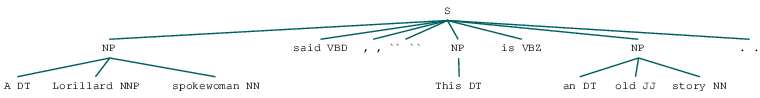

In [59]:
data[7]

In [62]:
simple_sentence = 'the quick fox jumped over the lazy dog'

In [73]:
simple_sentence_tag = pos_tag(word_tokenize(simple_sentence))

In [74]:
simple_sentence_tag

[('the', 'DT'),
 ('quick', 'JJ'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [75]:
chunk_grammar = """NP: {<DT>?<JJ>*<NN.*>}"""

rc = RegexpParser(chunk_grammar)

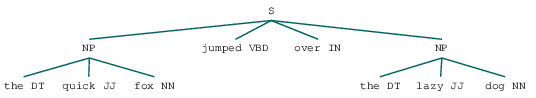

In [76]:
rc.parse(simple_sentence_tag)

In [86]:
chink_gramma = '''
NP: {<.*>+} 
}<VBD|IN>+{'''

rc = RegexpParser(chink_gramma)

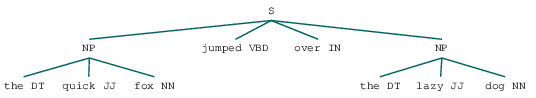

In [87]:
rc.parse(simple_sentence_tag)

In [89]:
tag_sents = pos_tag(word_tokenize(sentence))

In [90]:
tag_sents

[('The', 'DT'),
 ('brown', 'JJ'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [91]:
# create the shallow parser
grammar = """
NP: {<DT>?<JJ>*<NN.*>}
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}
VP: {<MD>?<VB.*>+}
"""

rc = RegexpParser(grammar)

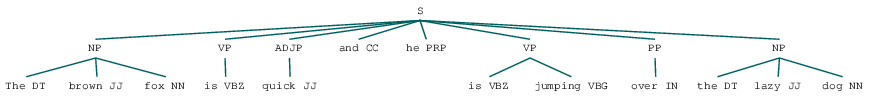

In [92]:
rc.parse(tag_sents)

In [102]:
print(rc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  56.3%%
    Precision:     27.0%%
    Recall:        55.7%%
    F-Measure:     36.4%%


In [ ]:
conlltags2tree()

In [106]:
print(tree2conllstr(train_data[7]))

A DT B-NP
Lorillard NNP I-NP
spokewoman NN I-NP
said VBD O
, , O
`` `` O
This DT B-NP
is VBZ O
an DT B-NP
old JJ I-NP
story NN I-NP
. . O


In [107]:
train_sent = train_data[7]

In [114]:
wtc = [w.split() for w in tree2conllstr(train_sent).split('\n')]

In [115]:
wtc[:5]

[['A', 'DT', 'B-NP'],
 ['Lorillard', 'NNP', 'I-NP'],
 ['spokewoman', 'NN', 'I-NP'],
 ['said', 'VBD', 'O'],
 [',', ',', 'O']]

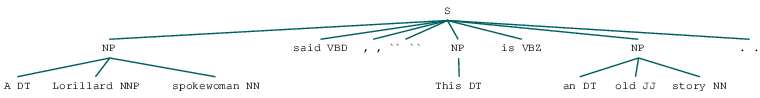

In [116]:
conlltags2tree(wtc)

In [145]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t,c) for w,t,c in sent] for sent in tagged_sents]


class NGramTagChunker(ChunkParserI):
    
    def __init__(self, train_sentences, tagger_classes=[UnigramTagger, BigramTagger]):
        # list of [(tag, chunk),...]
        train = conll_tag_chunks(train_sentences)
        
        # train model: input=tag, output=chunk
        self.chunk_tagger = combined_tagger(train, tagger_classes)
        
    def parse(self, tagged_sentence):
        '''
        input
        -----
            list of (word, tag)
            
        output
        ------
            list of (word, tag, chunk)
        '''
        if not tagged_sentence:
            return
        
        tag_list = [t for w, t in tagged_sentence]
        chunk_tag = self.chunk_tagger.tag(tag_list)
        return conlltags2tree([(w,t,c) for (w,t), (_, c) in zip(tagged_sentence, chunk_tag)])

In [147]:
ngt = NGramTagChunker(train_data)

/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


In [148]:
print(ngt.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  99.6%%
    Precision:     98.4%%
    Recall:       100.0%%
    F-Measure:     99.2%%


In [149]:
tag_sents

[('The', 'DT'),
 ('brown', 'JJ'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

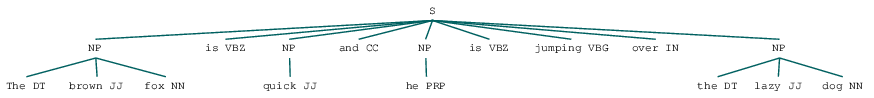

In [150]:
ngt.parse(tag_sents)

In [151]:
from nltk.corpus import conll2000

In [152]:
wsj_data = conll2000.chunked_sents()

In [153]:
len(wsj_data)

10948

In [154]:
train_wsj_data = wsj_data[:7500]
test_wsj_data = wsj_data[7500:]

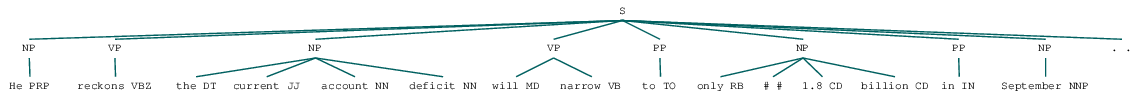

In [156]:
train_wsj_data[10]

In [157]:
tc = NGramTagChunker(train_sentences=train_wsj_data)

In [158]:
print(tc.evaluate(test_wsj_data))

ChunkParse score:
    IOB Accuracy:  89.4%%
    Precision:     80.8%%
    Recall:        86.0%%
    F-Measure:     83.3%%


### Dependency-based Parsing

In [1]:
import spacy

In [2]:
parser = spacy.load('en')

In [8]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"

#sentence = "It's written from the ground up in carefully memory-managed Cython"
#sentence = "spaCy is the best way to prepare text for deep learning"

In [9]:
dependency = "{left}<---{word}[{w_type}]--->{right}\n"

parsed_sent = parser(sentence)

for token in parsed_sent:
    print(dependency.format(left=[t.orth_ for t in token.lefts],
                            word=token.orth_,
                            w_type=token.dep_,
                            right=[t.orth_ for t in token.lefts]))

[]<---The[det]--->[]

[]<---brown[amod]--->[]

['The', 'brown']<---fox[nsubj]--->['The', 'brown']

['fox']<---is[ROOT]--->['fox']

[]<---quick[acomp]--->[]

[]<---and[cc]--->[]

[]<---he[nsubj]--->[]

[]<---is[aux]--->[]

['he', 'is']<---jumping[conj]--->['he', 'is']

[]<---over[prep]--->[]

[]<---the[det]--->[]

[]<---lazy[amod]--->[]

['the', 'lazy']<---dog[pobj]--->['the', 'lazy']



### Using Stanford Parser to generate the dependency tree

In [6]:
%%writefile stanford_parser.py
from nltk.parse.stanford import StanfordDependencyParser, StanfordParser
from nltk.tag import StanfordNERTagger
import os

path_ner = "/home/pongsakorn/Desktop/stanford-ner-2017-06-09"
path_parser = "/home/pongsakorn/Desktop/stanford-parser-full-2017-06-09"
path_postagger = "/home/pongsakorn/Desktop/stanford-postagger-full-2017-06-09"

class_path_cmd = ".:{}:{}:{}".format(path_ner, path_parser, path_postagger)

path_postagger_model = "/home/pongsakorn/Desktop/stanford-postagger-full-2017-06-09/models"
path_ner_clf = "/home/pongsakorn/Desktop/stanford-ner-2017-06-09/classifiers"

class_model_cmd = "{}:{}:{}".format(path_postagger_model, path_parser, path_ner_clf)
#print(class_path_cmd)
#print(class_model_cmd)

os.environ['CLASSPATH'] = class_path_cmd
os.environ['STANFORD_MODELS'] = class_model_cmd


model_path = '/home/pongsakorn/Desktop/stanford-parser-full-2017-06-09/englishPCFG.ser.gz'

stanford_dependency_parser = StanfordDependencyParser(model_path=model_path)
stanford_parser = StanfordParser(model_path=model_path)

stanford_ne_tagger = StanfordNERTagger('../../stanford-ner-2017-06-09/classifiers/english.all.3class.distsim.crf.ser.gz', 
                                      path_to_jar='../../stanford-ner-2017-06-09/stanford-ner.jar')


Overwriting stanford_parser.py


In [13]:
result = list(sdp.raw_parse(sentence))

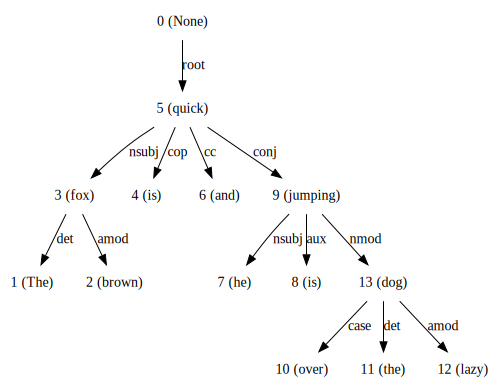

In [14]:
result[0]

In [15]:
result

[<DependencyGraph with 14 nodes>]

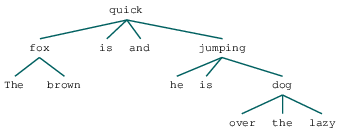

In [19]:
result[0].tree()

### Building Your Own Dependcy Parsers

In [20]:
import nltk


In [21]:
tokens = nltk.word_tokenize(sentence)

In [23]:
dependency_rules = """
'fox' -> 'The' | 'brown'
'quick' -> 'fox' | 'is' | 'and' | 'jumping'
'jumping' -> 'he' | 'is' | 'dog'
'dog' -> 'over' | 'the' | 'lazy'
"""

dependency_grammar = nltk.grammar.DependencyGrammar.fromstring(dependency_rules)

In [25]:
print(dependency_grammar)

Dependency grammar with 12 productions
  'fox' -> 'The'
  'fox' -> 'brown'
  'quick' -> 'fox'
  'quick' -> 'is'
  'quick' -> 'and'
  'quick' -> 'jumping'
  'jumping' -> 'he'
  'jumping' -> 'is'
  'jumping' -> 'dog'
  'dog' -> 'over'
  'dog' -> 'the'
  'dog' -> 'lazy'


In [26]:
# build dependency parser
dp = nltk.ProjectiveDependencyParser(dependency_grammar)

In [28]:
result = list(dp.parse(tokens))

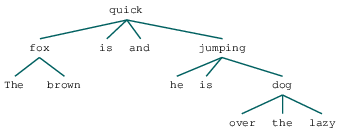

In [30]:
result[0]

In [31]:
print(result[0])

(quick (fox The brown) is and (jumping he is (dog over the lazy)))


### Constituency-based Parsing

In [35]:
# standford parser to generate parse trees
sp = StanfordParser(model_path=model_path)

In [38]:
result = list(sp.raw_parse(sentence))

In [39]:
print(result[0])

(ROOT
  (NP
    (S
      (S
        (NP (DT The) (JJ brown) (NN fox))
        (VP (VBZ is) (ADJP (JJ quick))))
      (CC and)
      (S
        (NP (PRP he))
        (VP
          (VBZ is)
          (VP
            (VBG jumping)
            (PP (IN over) (NP (DT the) (JJ lazy) (NN dog)))))))))


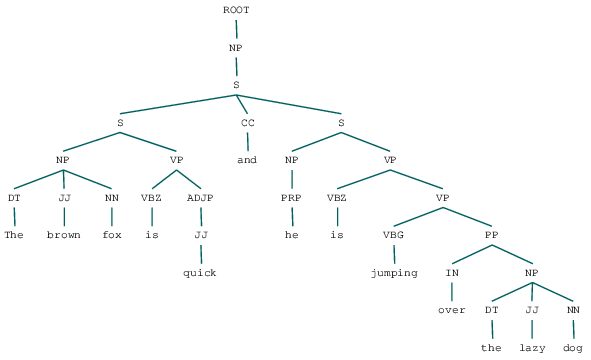

In [40]:
result[0]

### Building Your Own Constituency Parsers

In [41]:
import nltk
from nltk.grammar import Nonterminal
from nltk.corpus import treebank

In [42]:
training_set = treebank.parsed_sents()

In [45]:
print(training_set[1])

(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP Elsevier) (NNP N.V.))
          (, ,)
          (NP (DT the) (NNP Dutch) (VBG publishing) (NN group))))))
  (. .))


In [46]:
# extract the productions for all annotated training sentences
treebank_productions = list({production for sent in training_set for production in sent.productions()})

In [48]:
treebank_productions[:10]

[JJ -> 'literary',
 VBP -> 'hold',
 VBN -> 'known',
 VP -> VBP PP-DIR,
 -NONE- -> '*T*-218',
 VBN -> 'answered',
 S -> `` NP-SBJ VP :,
 VBD -> 'did',
 S -> ADVP PP-LOC , NP-SBJ VP .,
 NN -> 'crookery']

In [49]:
len(treebank_productions)

21763

In [50]:
training_set[1].productions()

[S -> NP-SBJ VP .,
 NP-SBJ -> NNP NNP,
 NNP -> 'Mr.',
 NNP -> 'Vinken',
 VP -> VBZ NP-PRD,
 VBZ -> 'is',
 NP-PRD -> NP PP,
 NP -> NN,
 NN -> 'chairman',
 PP -> IN NP,
 IN -> 'of',
 NP -> NP , NP,
 NP -> NNP NNP,
 NNP -> 'Elsevier',
 NNP -> 'N.V.',
 , -> ',',
 NP -> DT NNP VBG NN,
 DT -> 'the',
 NNP -> 'Dutch',
 VBG -> 'publishing',
 NN -> 'group',
 . -> '.']

In [52]:
# add more productions for each word, POS tag
for word, tag, in treebank.tagged_words():
    t = nltk.Tree.fromstring("({} {})".format(tag, word))
    for product in t.productions():
        treebank_productions.append(product)

In [58]:
print(treebank_grammar)

Grammar with 21763 productions (start state = S)
    JJ -> 'literary' [0.000263505]
    NNP -> 'GHKM' [0.000168039]
    VBP -> 'hold' [0.00248139]
    VBN -> 'known' [0.00460014]
    VBG -> 'evoking' [0.000984737]
    VP -> VBZ PP-TMP-CLR [0.000470588]
    VP -> VBP PP-DIR [0.000470588]
    -NONE- -> '*T*-218' [0.000284414]
    NN -> 'pulp' [0.000189705]
    VBN -> 'answered' [0.00106157]
    S -> `` NP-SBJ VP : [0.00129534]
    S -> ADVP PP-LOC , NP-SBJ VP . [0.00129534]
    VP -> VB PRT NP PP [0.000470588]
    VBG -> 'thumbing' [0.000984737]
    NNP -> 'Pat' [0.000252058]
    PP-LOC-3 -> IN CC IN NP [0.5]
    JJ -> '42-year' [0.000263505]
    NP-SBJ -> NP ADJP NN NN [0.00227273]
    VP -> VB NP NP-TMP [0.000470588]
    CD -> '94.8' [0.000443853]
    CD -> 'Fifteen' [0.000443853]
    NNP -> 'YMCA' [0.000168039]
    VP -> VBD SBAR , PP-1 [0.000470588]
    NN -> 'collar' [0.000316176]
    NP-SBJ -> DT NNP NN [0.00227273]
    NN -> 'bell-ringer' [0.00012647]
    VP -> VBP PP-LOC [0.00047

In [71]:
tagged_sent = nltk.pos_tag(nltk.word_tokenize(sentence))

In [68]:
tagged_sent

[('The', 'DT'),
 ('brown', 'JJ'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [69]:
for word, tag in tagged_sent:
    t = nltk.Tree.fromstring("({} {})".format(tag, word))
    for product in t.productions():
        treebank_productions.append(product)

In [75]:
# build the PCFG based grammar
treebank_grammar = nltk.grammar.induce_pcfg(start=Nonterminal('S'), 
                                            productions=treebank_productions)

In [76]:
# build the parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

In [77]:
tokens = nltk.word_tokenize(sentence)

In [78]:
result = list(viterbi_parser.parse(tokens))

In [79]:
print(result[0])

(S
  (NP-SBJ-163 (DT The) (JJ brown) (NN fox))
  (VP
    (VBZ is)
    (PRT (JJ quick))
    (S
      (CC and)
      (NP-SBJ (PRP he))
      (VP
        (VBZ is)
        (PP-1
          (VBG jumping)
          (NP (IN over) (DT the) (JJ lazy) (NN dog))))))) (p=2.02604e-48)


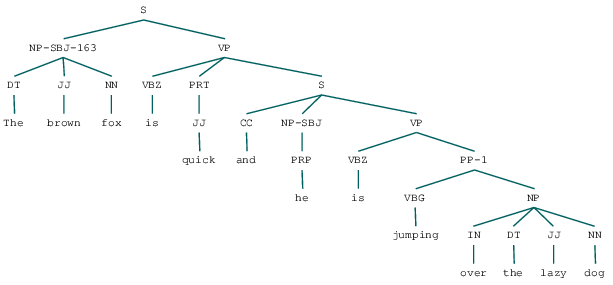

In [80]:
result[0]